## Trabajo No. 1
### Sobre: Algoritmos genéticos
#### Integrantes: Cristian Yepes Sanchez, Edison Escobar Posada

# Punto 1

$aptitud(x)=\begin{Bmatrix}
si (\sum x_{peso} \leqslant k) \Rightarrow  \sum x_{valor}
\\ 
sino \Rightarrow  0
\end{Bmatrix} $

## 1.1 Funcion de aptitud

In [467]:
import numpy as np

def funcion_aptitud(x, peso, valor, capacidad):

    if (np.sum(peso*x) <= capacidad):
        aptitud = np.sum(valor*x)
    else:
        aptitud = 0
    return aptitud

## 1.2 Parametros iniciales
Problema 1. <img src="images/problema1.1.1.png" />
Problema 2. <img src="images/problema1.1.2.png" />
Problema 3. <img src="images/problema1.1.3.png" />
Problema 4. <img src="images/problema1.1.4.png" />

In [175]:
#Problema 1
ni = 100 #numero de iteraciones
nc = 10 #tamaño de la poblacion
ng = 4 #numero de genes por cromosoma
pc = 0.9 #probabilidad de cruce
pm = 0.5 #probabilidad de mutacion

peso = [3, 5, 9, 5]
valor = [45, 30, 45, 10]
k = 16

In [424]:
#Problema 2
ni = 50 #numero de iteraciones
nc = 10 #tamaño de la poblacion
ng = 8 #numero de genes por cromosoma
pc = 0.9 #probabilidad de cruce
pm = 0.5 #probabilidad de mutacion

peso = [2, 20, 20, 30, 40, 30, 60, 10]
valor = [15, 100, 90, 60, 40, 15, 10, 1]
k = 102

In [780]:
#Problema 3
ni = 1000 #numero de iteraciones
nc = 100 #tamaño de la poblacion
ng = 7 #numero de genes por cromosoma
pc = 0.9 #probabilidad de cruce
pm = 0.5 #probabilidad de mutacion

peso = [31, 10, 20, 19, 4, 3, 6]
valor = [70, 20, 39, 37, 7, 5, 10]
k = 50

In [740]:
#Problema 4
ni = 100 #numero de iteraciones
nc = 10 #tamaño de la poblacion
ng = 8 #numero de genes por cromosoma
pc = 0.9 #probabilidad de cruce
pm = 0.5 #probabilidad de mutacion

peso = [25, 35, 45, 5, 25, 3, 2, 2]
valor = [350, 400, 450, 20, 70, 8, 5, 5]
k = 104

## 1.3 Inicializacion de poblacion (p) y calculo de funcion de aptitud

In [777]:
#P es la poblacion inicial
p = np.round(np.random.random([nc, ng]))

#fa es el vector de la función de aptitud de cada uno de los individuos de poblacion
fa = np.zeros([nc], dtype=np.int)

for i in range(nc):
    fa[i] = funcion_aptitud(p[i], peso, valor, k)

    
print("Poblacion inicial... ")
print (p)
print("Aptitudes... ")
print (fa)

Poblacion inicial... 
[[1. 1. 0. 0. 0. 1. 1.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 1. 1. 0.]
 [1. 1. 0. 0. 1. 1. 0.]
 [0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0.]
 [0. 1. 0. 0. 0. 0. 1.]
 [1. 1. 1. 0. 1. 1. 1.]
 [1. 0. 0. 1. 1. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0.]
 [1. 1. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 0. 0. 1. 1. 0.]
 [0. 1. 0. 1. 1. 0. 1.]
 [1. 1. 1. 1. 0. 0. 1.]
 [1. 1. 0. 0. 0. 1. 1.]
 [0. 1. 0. 0. 0. 1. 1.]
 [1. 0. 1. 1. 1. 1. 1.]
 [1. 1. 0. 1. 1. 1. 0.]
 [1. 1. 0. 0. 1. 1. 0.]
 [1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 1. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 1. 0. 1. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 1. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 1.]
 [1. 0. 0. 1. 1. 1. 1.]
 [1. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 0. 0. 1.]
 [1. 0. 0. 1. 0. 1. 1.]
 [0. 1. 0. 1. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 1. 1. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 1. 1. 0. 1. 1.]
 [1. 1. 0. 0. 1. 1. 1.]
 [0. 0. 1. 1. 1. 1. 0.]
 [0. 0. 1. 0. 0. 1. 1.]
 [1. 0. 1. 1. 1. 0

## 1.4. Ciclo principal del algoritmo genético:
**Seleccion->Cruce->Mutación->Evaluación->Inserción**

In [773]:
def seleccion_ruleta(numChilds):
    #Selección por medio de la ruleta
    probabilidades = np.zeros([nc], dtype=np.double)
    individuos = np.zeros([numChilds], dtype=np.int)
    for j in range (numChilds):
        for i in range(nc):
            probabilidades[i] = (float(fa[i])/np.sum(fa))
        
        #Calculemos el valor aleatorio de la ruleta
        numRandom = np.random.rand()
        #print("Numero Random (Ruleta): ", numRandom)
        #Calculemos las probabilidades acumuladas
        probabilidadesAcum = np.cumsum(probabilidades)
        
        #Seleccionemos un individuo segun el criterio explicado anteriormente
        individuos[j] = np.argmax(probabilidadesAcum >= numRandom)
        #print probabilidadesAcum[np.argmax(probabilidadesAcum >= numRandom)]
        #print("Individuo seleccionado: ", individuos)
    return individuos;

In [774]:
def show(yrandom, yruleta, x):
    a = np.array(range(0,ni))
    print "By Random"
    print yrandom
    '''
    plot solution
    '''
    best_path = p[np.argmax(fa)]
    plt.plot(x, yrandom, 'r*')#paths
    plt.plot(x, yrandom, linestyle=':', color='b')
    plt.show()
    
    print "By Ruleta"
    print yruleta
    '''
    plot solution
    '''
    best_path = p[np.argmax(fa)]
    plt.plot(x, yruleta, 'r*')#paths
    plt.plot(x, yruleta, linestyle=':', color='b')
    plt.show()

In [778]:
paux = p
def main_Bucle(method):    
    y = np.zeros([ni], dtype=np.float)
    print method
    for i in range(ni):       
        if (method == "random"):
            #Seleccion aleatoria
            p1 = np.random.randint(nc-1)
            p2 = np.random.randint(nc-1)        
        elif (method == "ruleta"):
            #Seleccion - Ruleta
            seleccionados = seleccion_ruleta(2)

            p1 = seleccionados[0]
            p2 = seleccionados[1]

        #Cruce a un punto
        if(np.random.rand() <= pc):
            cross_point = np.random.randint(ng)
            child1 = np.append(p[p1, 0:cross_point], p[p2, cross_point:])
            child2 = np.append(p[p2, 0:cross_point], p[p1, cross_point:])

        #Mutacion: se muta un bit aleatoriamente
        if(np.random.rand() <= pm):
            mut_point_c1 = np.random.randint(ng-1)
            mut_point_c2 = np.random.randint(ng-1)

            child1[mut_point_c1] = 1-child1[mut_point_c1]
            child2[mut_point_c2] = 1-child2[mut_point_c2]

        #Se evaluan los nuevos hijos
        eval_child1 = funcion_aptitud(child1, peso, valor, k)
        eval_child2 = funcion_aptitud(child2, peso, valor, k)

        #Insercion por reemplazo de los padres.
        if(eval_child1 > fa[p1]):
            p[p1] = child1
            fa[p1] = eval_child1

        if(eval_child2 > fa[p2]):
            p[p2] = child2
            fa[p2] = eval_child2

        y[i] = fa[np.argmax(fa)]
    return y

random
ruleta
By Random
[105. 105. 105. ... 107. 107. 107.]


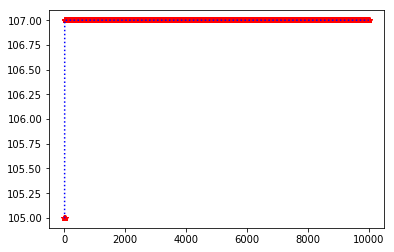

By Ruleta
[107. 107. 107. ... 107. 107. 107.]


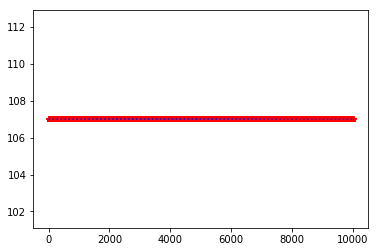

In [779]:
x = np.array(range(0, ni))
for i in range(2):    
    if (i == 0):        
        yrandom = main_Bucle('random')
    else:
        p = paux
        yruleta = main_Bucle('ruleta')
show(yrandom, yruleta, x)

## 1.5. Mostrar mejor individuo al final del ciclo

In [712]:
print 'La mejor configuración para la bolsa es: ', p[np.argmax(fa)]
print 'Con una función de aptitud de: ', fa[np.argmax(fa)]

La mejor configuración para la bolsa es:  [1. 0. 1. 1. 1. 0. 1. 1.]
Con una función de aptitud de:  900


# Punto 2

<img src='images/viajero.png' />

## 2.1 Inicializar parámetros del algoritmo genético y gráfico de los puntos

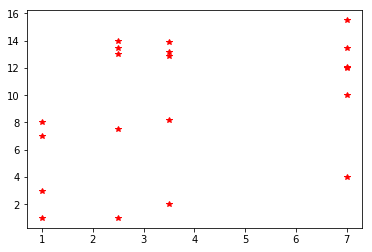

In [122]:
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt

x=np.array([1, 1, 1, 1, 2.5, 2.5, 2.5, 2.5, 2.5, 3.5, 3.5, 3.5, 3.5, 3.5, 7, 7, 7, 7, 7, 7]) #cities x coordinate
y=np.array([1, 3, 7, 8, 14, 13.5, 13, 7.5, 1, 2, 8.2, 12.9, 13.2, 13.9, 15.5, 13.5, 12.1, 12, 10, 4]) #cities y coordinate

ni = 1000 #numero de iteraciones
nc = 100 #numero de cromosomas
ng = 20 #numero de genes

pc = 0.9 #probabilidad de cruce
pm = 0.5 #probabilidad de mutacion

plt.plot(x, y, 'r*')#cities

## 2.2 Función de aptitud
Para este caso, la función de aptitud de un cromosoma $c$ se define el inverso de la sumatoria de las distancias entre ciudades consecutivas que representa. Por ejemplo, el cromosoma $c = [1, 2, 3]$  representa una ruta que recorre en orden $ciudad_1->ciudad_2->ciudad_3$.

En cuyo caso, la función de aptitud sería:

$\frac{1}{\sqrt{(ciudad_1[x]-ciudad_2[x])^2 + (ciudad_1[y]-ciudad_2[y])^2} + \sqrt{(ciudad_2[x]-ciudad_3[x])^2 + (ciudad_2[y]-ciudad_3[y])^2}}$ 

En términos generales, la función de aptitud se define como:
$aptitud(x) = \frac{1}{\sum{\sqrt{(ciudad_i[x]-ciudad_{i+1}[x])^2 + (ciudad_i[y]-ciudad_{i+1}[y])^2 }}}$

In [125]:
def funcion_aptitud(c, x, y):
    
    #cerremos el ciclo entre ciudades
    c = np.append(c,c[0])
       
    dist_sum = 0 #Esta variable almacenará la sumatoria de las distancias. Inicializar.
    
    for i in range(len(x)):
        #por cada ciudad i, tomar los valores x y y de las ciudades i y la ciuad i+1
        tx1 = x[c[i]]
        tx2 = x[c[i+1]]
        ty1 = y[c[i]]
        ty2 = y[c[i+1]]
        
        #Valor absoluto de la distancia entre dos 2 puntos adyacentes (ciudades)
        dist_sum += np.sqrt(abs( ((tx2-tx1)**2) + ((ty2-ty1)**2) ))
    
    return 1.0/dist_sum

## 2.3. Inicializar población (p) y calcular la aptitud (fa) de sus individuos

En este caso, la población inicial consiste en una matriz de enteros $p_{nc \times ng}$, con la restricción de que la secuencia de ciudades no puede tener repetición de ciudades. Por ello cada cromosoma es una permutación de ciudades.

In [126]:
fa = np.zeros([nc], dtype=np.float) #vector de aptitudes
p = np.zeros([nc, ng], dtype=np.int) #matriz de poblacion

for i in range(nc):
    #COMPLETAR: 2 lineas
    p[i, :] = np.random.permutation(ng) #permutacion
    fa[i] = funcion_aptitud(p[i, :], x, y) #funcion de aptitud
print p

[[15 19  2 ... 13  5 18]
 [17 14 12 ... 11  6 16]
 [10  4  1 ... 18 11  6]
 ...
 [ 8 11  9 ... 12  2 16]
 [15  6 12 ... 18 10  9]
 [18 16  9 ...  2  4 17]]


### 2.4. Ciclo principal del algoritmo genético:
**Seleccion->Cruce->Mutación->Evaluación->Inserción**

Analizar en clase el siguiente código y:

1. Evaluar la convergencia del algoritmo.
2. Medir el impacto de los parametros iniciales en la convergencia.
3. Implementar la etapa de inserción por reemplazo de los mejores de la población.

In [139]:
for i in range(ni):
    #Seleccion: Padre1 - el mejor de la población. Padre2 - aleatorio
    p1_index = np.argsort(fa)[::-1][0]
    p2_index = np.random.randint(nc)
    p1 = p[p1_index]
    p2 = p[p2_index]
    
    #Cruce: un punto
    if(np.random.rand() <= pc):
        cross_point = np.random.randint(ng)
        child1 = p1[0:cross_point]
        child2 = p2[0:cross_point]
        
        init_k = cross_point
        
        for k in range(ng):
            j = (init_k+k)%ng
            if not(np.count_nonzero(child1 == p2[j])):
                child1 = np.append(child1, p2[j])
            
            if not(np.count_nonzero(child2 == p1[j])):
                child2 = np.append(child2, p1[j])

    #Mutacion: cambio de orden
    if(np.random.rand() <= pm):
        mut_point_c1 = np.random.randint(ng-1)
        mut_point_c2 = np.random.randint(ng-1)
    
        temp = child1[mut_point_c1]
        child1[mut_point_c1] = child1[mut_point_c2]
        child1[mut_point_c2] = temp
        
        temp = child2[mut_point_c1]
        child2[mut_point_c1] = child2[mut_point_c2]
        child2[mut_point_c2] = temp
    
    #Evaluacion de los hijos
    eval_child1 = funcion_aptitud(child1, x, y)
    eval_child2 = funcion_aptitud(child2, x, y)
    
    #Inserción: reemplazo de padres
    if(eval_child1 > fa[p1_index]):
        p[p1_index] = child1
        fa[p1_index] = eval_child1
    
    if(eval_child2 > fa[p2_index]):
        p[p2_index] = child2
        fa[p2_index] = eval_child2
    

TypeError: funcion_aptitud() takes exactly 4 arguments (3 given)

## 2.5. Mostrar mejor individuo al final del ciclo

In [130]:
print 'La mejor ruta es: ', p[np.argmax(fa)]
print 'Con una función de aptitud de: ', fa[np.argmax(fa)]

La mejor ruta es:  [17 18 19 10  7  3  9  8  0  1  2 12 11  6  4  5 13 15 14 16]
Con una función de aptitud de:  0.019503425542015992


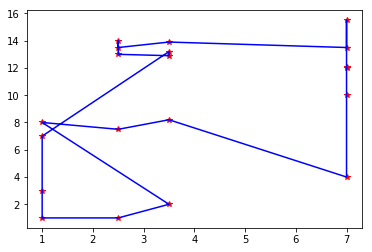

In [131]:
'''
plot solution
'''
best_path = p[np.argmax(fa)]
plt.plot(x, y, 'r*')#paths
plt.plot(x[best_path], y[best_path], 'b')#paths
plt.show() 

## Punto 3

Determinar los valores de x1, x2, …, x10 de tal forma que la siguiente función se maximice:
<br>
F(x1,x2,..,x10)= (x1*x2*x3*x4*x5)/(x6*x7*x8*x9*x10)  donde x1,..,x10=[1 ... 10] 

[ 1  2  3  4  5  6  7  8  9 10]
[1.17136781e+01 6.68985816e+00 1.59735537e-03 3.76605784e-01
 1.57147590e+02 4.57705764e-02 3.11555698e-01 1.42460720e+01
 1.86011905e-02 6.07343662e+01]


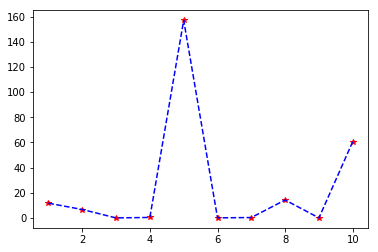

In [520]:
x = np.round(np.random.random([ng, ng])*100)
x1 = np.array(range(1,ng+1))
y = np.zeros([ng])

for i in range(ng):
    y[i] = evalreal(x[i])

plt.plot(x1,y, 'r*')
plt.plot(x1,y, linestyle='--', color='b')
plt.show()


<hr>
### 3.1.1 Funcion de aptitud

In [521]:
def evalreal(x):
    return (x[0]*x[1]*x[2]*x[3]*x[4])/(x[5]*x[6]*x[7]*x[8]*x[9])

<hr>
### 3.1.2. Inicializar parámetros del algoritmo genético

In [522]:
#GA parameters
ni = 1000 #number of iterations
nc = 100 #number of individuals
ng = 10 #number of genes == variable x

pc = 0.9
pm = 0.5
alpha = 0.5 #cross percentage for arithmetic cross

#search range
a = 1
b = 10

### 3.1.3. Inicializar población (p) y calcular la aptitud (fa) de sus individuos

In [523]:
p = np.random.rand(nc, ng)
p = (b-a)*p + a
fa = np.zeros([nc], dtype=np.float) #vector de aptitudes

for i in range(nc):
    fa[i] = evalreal(p[i]) #funcion de aptitud

print p

[[2.15313155 5.78134727 2.7463372  9.76361468 7.46113759 4.57077575
  5.35055821 4.84891506 9.89053059 5.94311569]
 [3.51668223 4.97291631 3.43440238 8.70590262 6.14334314 8.72759315
  1.13797461 6.7148877  9.4915205  8.94973796]
 [1.75146019 4.17444698 6.70918502 8.95301655 7.41757076 3.40823166
  4.48301685 1.80738827 5.21592536 5.71665978]
 [8.30974371 6.21190289 1.37383647 9.8719897  7.82977775 9.53232887
  8.09005111 1.17087235 9.14220089 2.46740052]
 [4.66759315 4.98902771 2.31028206 2.60294202 5.1517531  9.65787882
  9.89584423 3.70904937 7.27462583 7.10535367]
 [2.07473965 5.02332373 1.58742086 4.91713917 3.77326868 2.00511103
  7.6199694  9.44702244 5.6079112  8.77129852]
 [9.94203307 9.09274809 2.1604174  8.07867056 2.2624615  5.43063791
  7.45155721 2.2672766  7.7158396  4.78117953]
 [2.56630516 5.2185074  1.73097328 4.9521508  7.00868048 3.28061094
  8.92828546 8.89446502 1.39742754 3.81766911]
 [7.03141479 2.00905496 8.55172311 4.00374988 1.7099835  5.4455917
  3.26598997 

In [480]:
print fa

[2.98175518e+00 1.02464983e+00 1.41024488e+00 1.36536479e-01
 5.84054856e-02 5.24433379e-02 1.97484133e+00 2.89829558e+00
 5.38286478e-01 1.15040309e+00 1.16650162e+00 2.03404376e+00
 1.13835987e-01 1.51413842e+00 4.88643214e-02 8.93646998e-01
 4.22435139e-01 5.83582208e+00 8.88780475e+00 1.86297907e-01
 3.80020634e-01 3.92056355e-02 1.28108657e-01 2.38188646e+00
 4.57243755e-02 2.12703722e+00 3.81519344e+00 2.75671542e-01
 6.23692640e-01 5.50936320e+00 8.53243921e-01 5.58606673e+00
 3.26852776e+00 3.25261979e+01 8.73139679e+00 1.84896954e+01
 4.54990022e+00 7.38217672e+00 4.35329518e-01 3.28291236e-01
 2.79500150e-01 4.32186150e-01 1.35614380e+00 2.58888165e+00
 2.58006651e-01 2.61012341e-01 2.75758482e-01 1.61620575e+00
 2.54571964e-01 3.90494320e-01 6.34093449e-01 8.65845111e+00
 3.19398187e-01 5.51134805e-01 2.45540048e+01 2.18620019e+00
 6.12387426e-01 1.72948609e-01 1.78420858e-01 1.91999137e-01
 8.94653690e-01 5.05207173e-01 2.52422157e-01 8.56188760e-02
 3.74227632e-01 2.771541

### 3.1.4. Ciclo principal del algoritmo genético:
Seleccion->Cruce->Mutación->Evaluación->Inserción

In [524]:
for i in range(ni):
    #selection: simple - random
    p1_index = np.random.randint(nc)
    p2_index = np.random.randint(nc)
    p1 = p[p1_index]
    p2 = p[p2_index]
    
    #cross
    if(np.random.rand() <= pc):
        child1 = alpha*p1+(1-alpha)*p2
        child2 = alpha*p2+(1-alpha)*p1
    
    #evaluation
    eval_child1 = evalreal(child1)
    eval_child2 = evalreal(child2)
    
    #insertion
    if(eval_child1 < fa[p1_index]):
        p[p1_index] = child1
        fa[p1_index] = eval_child1
    
    if(eval_child2 < fa[p2_index]):
        p[p2_index] = child2
        fa[p2_index] = eval_child2

### 3.1.5. Mostrar mejor individuo al final del ciclo

In [525]:
print 'El valor de [x1, x2, ... x10] que maximizan la función es: ', p[np.argmax(fa)]
print 'Con una función de aptitud de: ', fa[np.argmax(fa)]

El valor de [x1, x2, ... x10] que maximizan la función es:  [2.92056868 4.01728246 4.55846521 4.09726667 3.52055509 7.17200308
 7.19129917 7.82057103 7.25547733 7.46550389]
Con una función de aptitud de:  0.03531119446295306
